In [83]:
import matplotlib.pyplot as plt
from strategy import (
    staking,
    bonding_with_restake
)


In [84]:
# TIME
# rebase_rate = 0.6203  # %
# bond_discount = 7.17  # %
# SPA
rebase_rate = (1.0923**(1/15)-1)*100  # %
bond_discount = 8.32  # %
principal = 10000  # $
price = 8700  # $
roi_5d = (1+rebase_rate/100)**(3*5) - 1
apy = (1+rebase_rate/100)**(3*365) - 1


In [85]:
print(f'bond discount = {bond_discount/100:,.2%}')
print(f'       roi 5d = {roi_5d:,.2%}')
print(f'          apy = {apy:,.0%}')


bond discount = 8.32%
       roi 5d = 9.23%
          apy = 62,845%


In [86]:
def restaking_strategy(schedule=None):
    return bonding_with_restake(principal, price,
                                restake_schedule=schedule,
                                rebase_rate=rebase_rate, bond_discount=bond_discount, fee=0.0)


strategies = {
    f'Just staking at roi {roi_5d:.2%}': staking(principal, price, rebase_rate=rebase_rate),
    'Bonding with perfect restaking': restaking_strategy(),
    'Restake once per day': restaking_strategy(
        [False, True, False]*5),
    'Restaked once in day 2 and day 4 each': restaking_strategy(
        [i in (4,10) for i in range(15)]),
    'Restake once in day 3': restaking_strategy(
        [False]*7 + [True] + [False]*7,),
    'Bonded but forget to restake': restaking_strategy(
        [False]*15,),
}


In [87]:
for name, result in strategies.items():
    print(f'{name:>40}: roi 5d = {result.roi:<9.4%}, apy = {result.apy:<10,.0%}')


               Just staking at roi 9.23%: roi 5d = 9.2300%  , apy = 62,845%   
          Bonding with perfect restaking: roi 5d = 13.5790% , apy = 1,088,230%
                    Restake once per day: roi 5d = 12.9575% , apy = 729,004%  
   Restaked once in day 2 and day 4 each: roi 5d = 12.0290% , apy = 399,039%  
                   Restake once in day 3: roi 5d = 11.1052% , apy = 217,981%  
            Bonded but forget to restake: roi 5d = 8.3200%  , apy = 34,077%   


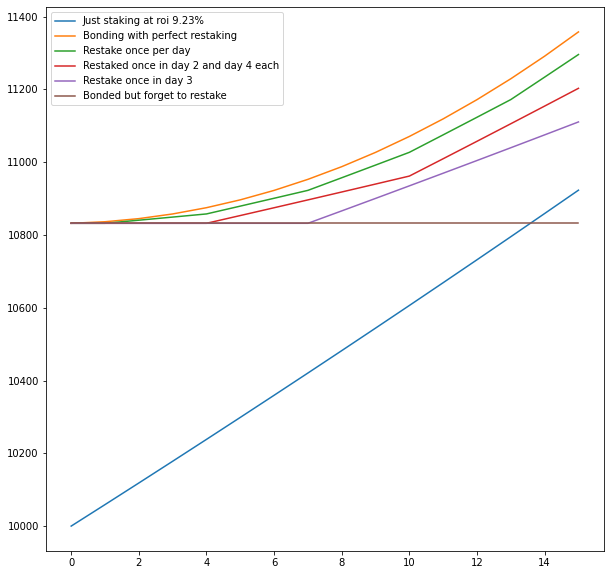

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for name, result in strategies.items():
    ax.plot([v.value for v in result.balance], label=name)
ax.legend()
